1. Load the dataset. 
    - Normalize the data appropriately (scikit.prreprocessing scale).
2. Train a k-nearest neighbor classifier on the training data, and use it to predict the test data output.
    - Experiment with variations (values of k, etc) to find a good model. Save the best predicted result.
3. Train a Gaussian naïve Bayes classifier; use it to predict the test data output. Experiment with
    - variations (other types of Bayes classifiers, for example) to find a good model. Save the best predicted result.
4. Train a decision tree classifier and use it to predict the test data output. 
    - Experiment with variations (depth, criterion, etc.) to find a good model. Save the best predicted result.
5. Print the misclassification rate and confusion matrix of each classifier.
6. Form a new set of predicted ouputs by “voting” the three results of the three classifiers. 
10. Print the misclassification rate and the confusion matrix for the ensemble model formed by voting the results of the three independent classifiers.

For KNN
Maximum Accuarcy: 98.4
For model configuration: 4 2 distance
Confusion matrix, without normalization
[[109   0   0   1]
 [  0 135   3   0]
 [  1   0 120   0]
 [  1   0   2 128]]


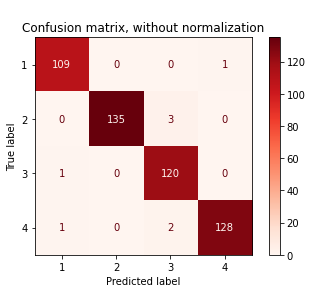

Number of mislabeled points out of a total of 500 are: 8
########################################

########################################

For Naive Bayes
Accuracy for Gaussian Naive Bayes Classifier: 98.0
Accuracy for Bernoulli Naive Bayes Classifier: 89.0
Confusion matrix, without normalization
[[109   0   1   0]
 [  0 131   7   0]
 [  1   0 120   0]
 [  1   0   0 130]]


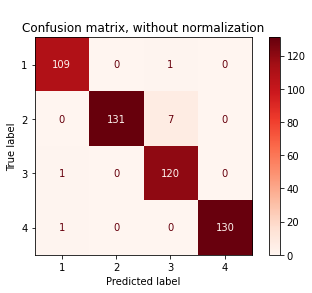

Number of mislabeled points out of a total of 500 are: 10
########################################

########################################

For Decision Tree classifier
Maximum Accuarcy: 97.8
For Model COnfiguration: [4, 'entropy']
Confusion matrix, without normalization
[[109   0   1   0]
 [  0 132   6   0]
 [  2   0 119   0]
 [  1   0   1 129]]


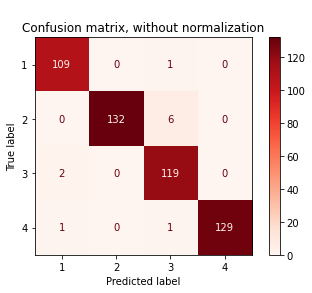

Number of mislabeled points out of a total of 500 are: 11
########################################

########################################

Accuracy for ensemble model: 98.0
Confusion matrix, without normalization
[[109   0   1   0]
 [  0 131   7   0]
 [  1   0 120   0]
 [  1   0   0 130]]
Number of mislabeled points out of a total of 500 are: 10


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import math 

train_data = pd.read_excel('data.xlsx', sheet_name='train') 
test_data = pd.read_excel('data.xlsx', sheet_name='test') 

train_data_X = train_data.drop(["labels"], axis=1) 
train_data_Y = train_data["labels"]
test_data_X = test_data.drop(["labels"], axis=1) 
test_data_Y = test_data["labels"]

train_X = train_data_X; train_Y = train_data_Y
test_X = test_data_X; test_Y = test_data_Y

# normmalze the data, Mean Sigma Normalization
train_X = scale(train_X, axis=0, with_mean=True, with_std=True, copy=False)
test_X = scale(test_X, axis=0, with_mean=True, with_std=True, copy=False)

# Class names for confusion matrix representation
class_names = np.sort(train_Y.unique())

# Plot confusion matrix
def conf(model, X, Y):
    disp = plot_confusion_matrix(model, X, Y, display_labels=class_names, values_format= 'd',
                                    cmap=plt.cm.Reds,normalize=None)
    disp.ax_.set_title("\nConfusion matrix, without normalization")
    print("Confusion matrix, without normalization")
    print(disp.confusion_matrix)
    conf = disp.confusion_matrix
    plt.show()
    print('Number of mislabeled points out of a total of {} are: {}'.format(np.sum(conf),np.sum(conf)-np.sum(np.diagonal(conf))))
    print("########################################\n")
    return 0

# In sklearn.neighbors.KNeighborsClassifier default distance metric is 'minkowski'
# Hence value of p integer (Power parameter for the Minkowski metric) 
# decides which distance type to choose from.
# When p = 1, it is Manhattan_distance & for p = 2 it Euclidean_distance.

# weights = ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally. **unweighted version
# weights = ‘distance’: weight points by the inverse of their distance. **weighted version
weights_crit = ['uniform' , 'distance']

Acc_all = []
Acc_para = []
for k in range(1,25+1):
    for p in range(1,2+1):
        for weights in weights_crit:
            Knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', 
                                             p=p, weights=weights).fit(train_X, train_Y)
            pred = Knn_model.predict(test_X)
            Acc = round(np.mean(pred == test_Y)*100,3)
            config = [k,p,weights]
            Acc_all.append(Acc)
            Acc_para.append(config)
            
Max_acc = max(Acc_all)
index = Acc_all.index(max(Acc_all))
k1,p1,weights1 = Acc_para[index]
print("For KNN")
print("Maximum Accuarcy:",Max_acc)
print("For model configuration:",k1,p1,weights1)

data_len = len(test_Y)
# Best KNN model parameters: k1,p1,weights1
best_Knn_model = KNeighborsClassifier(n_neighbors=k1, metric='minkowski', 
                                             p=p1, weights=weights1).fit(train_X, train_Y)
KNN_pred = best_Knn_model.predict(test_X)
KNN_pred = KNN_pred.reshape(data_len,-1)
conf(best_Knn_model,test_X,test_Y)
print("########################################\n")

print("For Naive Bayes")
# Gaussian Naive Bayes Classifier
NB_Gau = GaussianNB()
# Bernoulli Naive Bayes Classifier
NB_Ber = BernoulliNB()

NB_Gau.fit(train_X, train_Y)
NB_Gau_pred = NB_Gau.predict(test_X)
NB_Gau_Acc = round(np.mean(NB_Gau_pred == test_Y)*100,3)
print("Accuracy for Gaussian Naive Bayes Classifier:",NB_Gau_Acc)

NB_Ber.fit(train_X, train_Y)
NB_Ber_pred = NB_Ber.predict(test_X)
NB_Ber_Acc = round(np.mean(NB_Ber_pred == test_Y)*100,3)
print("Accuracy for Bernoulli Naive Bayes Classifier:",NB_Ber_Acc)

# Best Naive Bayes Classifier (Gaussian)
NB_Gau.fit(train_X, train_Y)
NB_Gau_pred = NB_Gau.predict(test_X)
NB_Gau_pred = NB_Gau_pred.reshape(data_len,-1)
conf(NB_Gau,test_X,test_Y)
print("########################################\n")

DT_crit = ['gini', 'entropy']
Depth = [i for i in range(4,15)]
Depth.append(None)
# Tree Depth: [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 'None']
DT_Acc_all = []
DT_Acc_para = []
for depth in Depth:
    for crit in DT_crit:
        DT = DecisionTreeClassifier(random_state=0,criterion= crit, max_depth=depth)
        DT.fit(train_X, train_Y)
        DT_pred = DT.predict(test_X)
        DT_Acc = round(np.mean(DT_pred == test_Y)*100,3)
        DT_config = [depth,crit]
        DT_Acc_all.append(DT_Acc)
        DT_Acc_para.append(DT_config)

Max_acc = max(DT_Acc_all)
index = DT_Acc_all.index(max(DT_Acc_all))
depth1, crit1 = DT_Acc_para[index]
print("For Decision Tree classifier")
print("Maximum Accuarcy:",Max_acc)
print("For Model COnfiguration:",DT_Acc_para[index])

# Best Decision Tree classifier parameters: depth1,crit1
DT_best = DecisionTreeClassifier(random_state=0,criterion= crit1, max_depth=depth1).fit(train_X, train_Y)
DT_pred = DT_best.predict(test_X)
DT_pred = DT_pred.reshape(data_len,-1)
conf(DT_best,test_X,test_Y)
print("########################################\n")

# concatenate the predictions from other models for voting
en = np.concatenate((KNN_pred, NB_Gau_pred, DT_pred), axis=1)

# Voting using mode.
from statistics import mode
en_op = []
for i in range(en.shape[0]):
    try:
        en_op.append(mode(en[i,:]))
    except ValueError:
        en_op.append(min(en[i,:]))

# Find accuracy of the ensemble model
en_Acc = round(np.mean(en_op == test_Y)*100,3)
print("Accuracy for ensemble model:",en_Acc)

conf = confusion_matrix(test_Y, en_op)
print("Confusion matrix, without normalization")
print(conf)
print('Number of mislabeled points out of a total of {} are: {}'.format(np.sum(conf),np.sum(conf)-np.sum(np.diagonal(conf))))